<a href="https://colab.research.google.com/github/adityawadkr/CODSOFT/blob/main/SMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-50a9359ba39d>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['label'], palette='coolwarm')


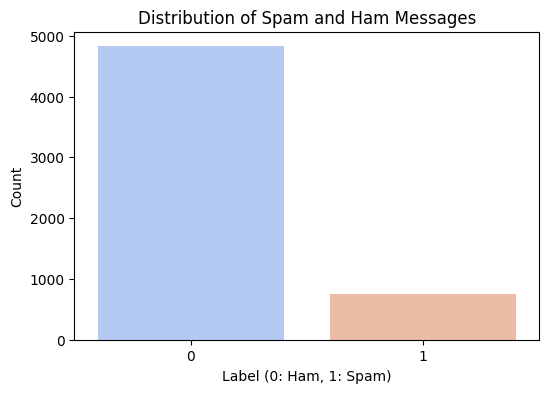

Naive Bayes Accuracy: 0.9677
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



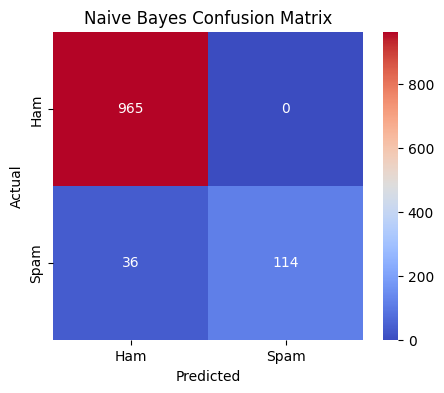

Logistic Regression Accuracy: 0.9507
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.98      0.65      0.78       150

    accuracy                           0.95      1115
   macro avg       0.96      0.82      0.88      1115
weighted avg       0.95      0.95      0.95      1115



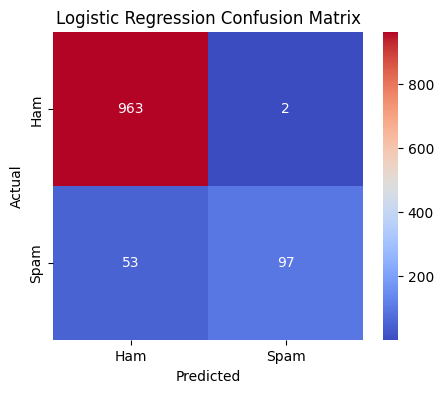

SVM Accuracy: 0.9749
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.98      0.83      0.90       150

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



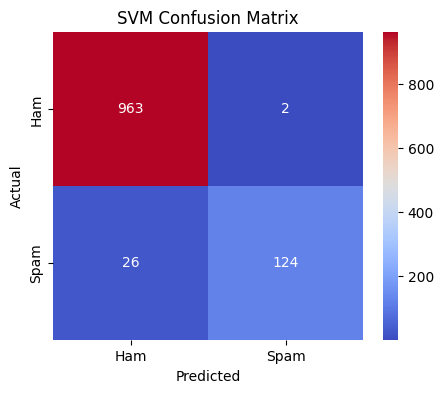

In [5]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = "/content/spam.csv"
df = pd.read_csv(file_path, encoding='latin-1')

# Data Cleaning
# Keeping only the necessary columns
df = df.iloc[:, :2]
df.columns = ['label', 'message']
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    return text

df['clean_message'] = df['message'].apply(clean_text)

# Visualizing Data Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['label'], palette='coolwarm')
plt.title("Distribution of Spam and Ham Messages")
plt.xlabel("Label (0: Ham, 1: Spam)")
plt.ylabel("Count")
plt.show()

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_message'], df['label'], test_size=0.2, random_state=42)

# Convert text to TF-IDF features
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train and Evaluate Models
models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix Visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
